### (0 баллов) Считываем данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

C:\Users\valer\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Каждая квартира имеет 13 признаков:

In [3]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [4]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [6]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.1, random_state=42)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [8]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression().fit(X_train, y_train)
y_pred = LinReg.predict(X_test)


### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [9]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return np.mean((y_pred-y_real)**2)

In [10]:
print('Our MSE:', MSE(y_test, y_pred))
print('Sklearn MSE:', mean_squared_error(y_true=y_test, y_pred=y_pred))

Our MSE: 14.995852876582463
Sklearn MSE: 14.995852876582463


Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [11]:
y_pred_const = len(X_test) * [y_train.mean()]
y_pred_const


[22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494505496,
 22.694505494

In [12]:
print('LinReg MSE:', MSE(y_test, y_pred))
print('Naiv alg MSE:', MSE(y_test, y_pred_const))

LinReg MSE: 14.995852876582463
Naiv alg MSE: 65.00802631111615


### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [13]:
from sklearn.linear_model import Ridge
MyRidge = Ridge().fit(X_train, y_train)
y_pred_ridge = MyRidge.predict(X_test)

In [14]:
print('LinReg MSE:', MSE(y_test, y_pred))
print('Ridge MSE:', MSE(y_test, y_pred_ridge))

LinReg MSE: 14.995852876582463
Ridge MSE: 14.775452511215347


In [20]:
Coef = np.arange(0.1, 2.0, 0.2)
Mses = []
for i in Coef:
    mse = MSE(y_test, Ridge(alpha=i).fit(X_train, y_train).predict(X_test))
    Mses.append(mse)
    print(i, mse)



0.1 14.933506462681155
0.30000000000000004 14.853121042582119
0.5000000000000001 14.809385226585512
0.7000000000000001 14.786881642699177
0.9000000000000001 14.77714655725333
1.1000000000000003 14.775296466176181
1.3000000000000003 14.778400003618058
1.5000000000000004 14.784641003970462
1.7000000000000004 14.792865369835225
1.9000000000000004 14.80232488145289


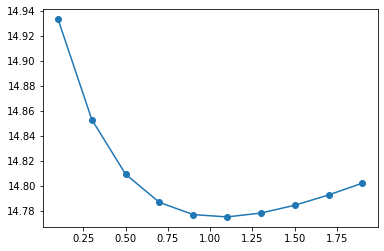

In [16]:
plt.scatter(Coef, Mses)
plt.plot(Coef, Mses)
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

In [18]:
print(min(Mses))


14.775296466176181

Да, регуляризация помогает. Чтобы минимизировать ошибку, нужно выбрать коэф. рег. раный 1,1. При этом ошибка равна 14.775296466176181. Данный эксперимент дает нам понять, что наша модель, скорее всего, переобучается. Хотя ошибка не сильно уменьшается при использовании Ridge. И оптимальным коэф. является 1,1.